<a href="https://colab.research.google.com/github/venkateshblks/SVM/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

## Exploratory Data Analysis (EDA)

In [ ]:
mr=pd.read_csv('mushroom.csv')
mr

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [ ]:
mr.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
mr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cap_shape                 2000 non-null   object 
 1   cap_surface               2000 non-null   object 
 2   cap_color                 2000 non-null   object 
 3   bruises                   2000 non-null   object 
 4   odor                      2000 non-null   object 
 5   gill_attachment           2000 non-null   object 
 6   gill_spacing              2000 non-null   object 
 7   gill_size                 2000 non-null   object 
 8   gill_color                2000 non-null   object 
 9   stalk_shape               2000 non-null   object 
 10  stalk_root                2000 non-null   object 
 11  stalk_surface_above_ring  2000 non-null   object 
 12  stalk_surface_below_ring  2000 non-null   object 
 13  stalk_color_above_ring    2000 non-null   object 
 14  stalk_co

In [ ]:
mr.isna().sum()

cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [ ]:
mr['class'].value_counts()

class
poisonous    1400
edible        600
Name: count, dtype: int64

In [ ]:
mr.describe()

,stalk_height,cap_diameter
count,2000.000000,2000.000000
mean,8.449118,12.314345
std,3.697217,7.048845
min,2.000000,1.000000
25%,5.291009,5.723521
50%,8.318596,12.124902
75%,11.781272,18.698605
max,15.095066,25.000054


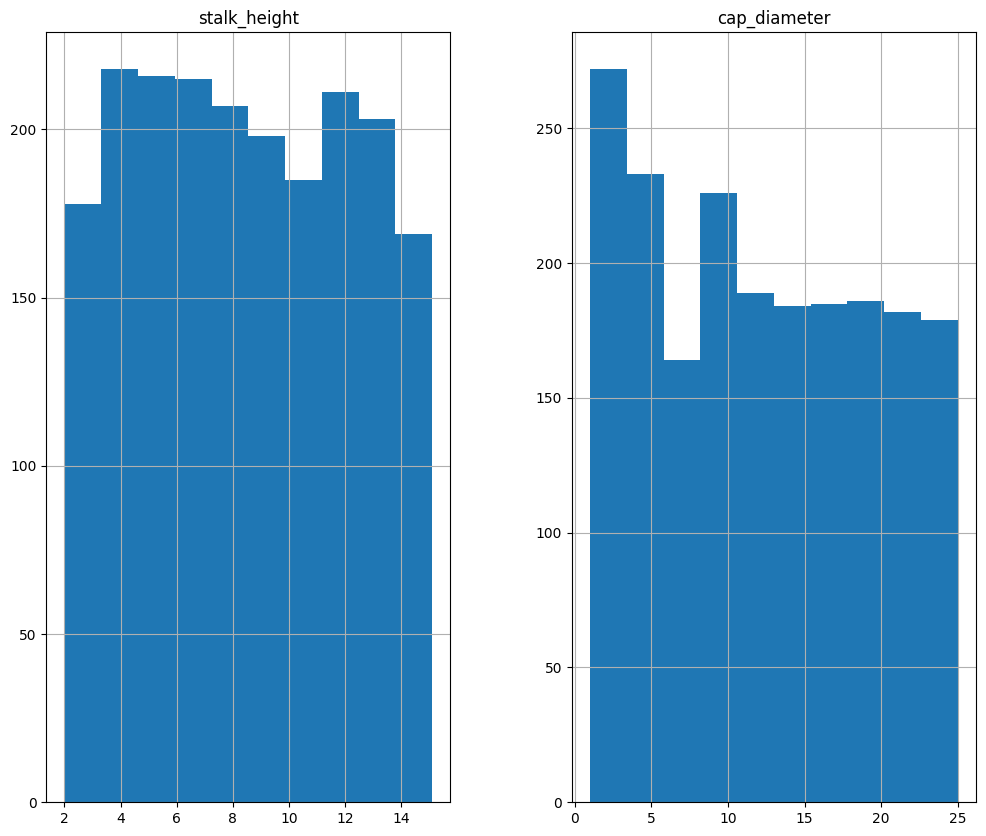

In [ ]:
mr.hist(figsize=(12, 10))
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

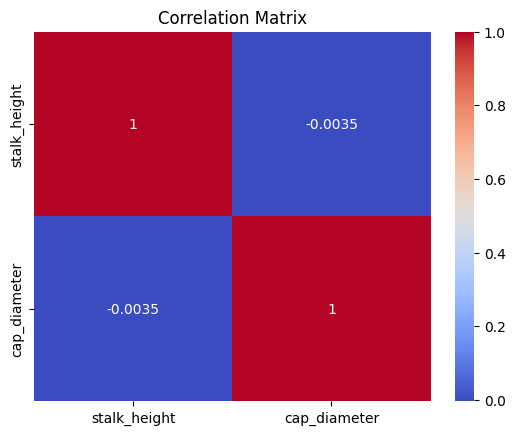

In [ ]:
correlation_matrix = mr.iloc[:,-2:].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

In [ ]:
mr.iloc[:,-2:]

,stalk_height,cap_diameter
0,14.276173,5.054983
1,3.952715,19.068319
2,9.054265,7.205884
3,5.226499,20.932692
4,14.037532,12.545245
...,...,...
1995,5.877891,17.464145
1996,6.500840,13.501957
1997,13.558064,11.270020
1998,11.092703,8.423199


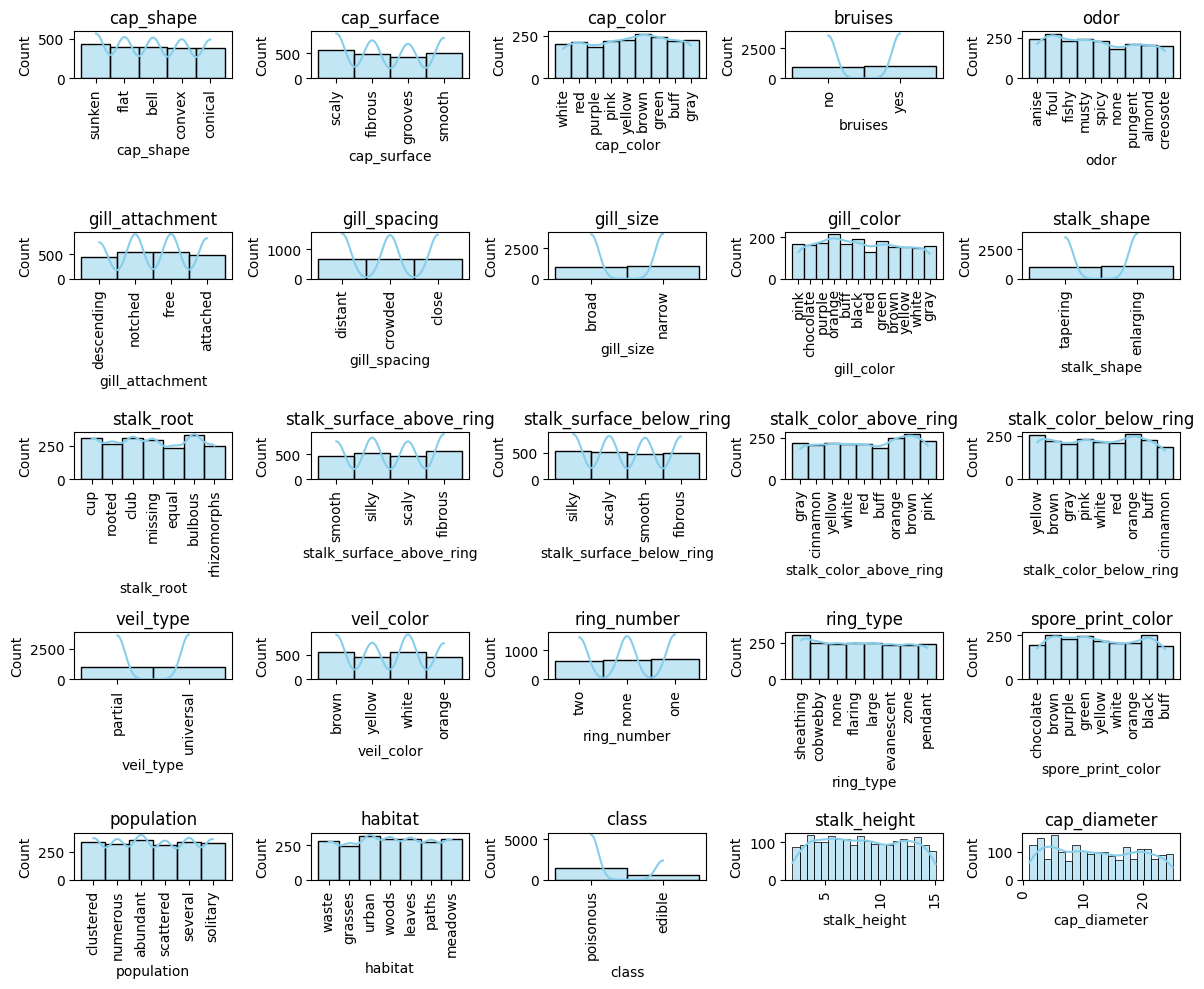

In [ ]:
plt.figure(figsize=(12, 10))
for i, column in enumerate(mr.columns):
    plt.subplot(5, 5, i + 1)
    sns.histplot(mr[column], kde=True, color='skyblue', bins=20)
    plt.title(column)
    plt.xticks(rotation=90)
plt.tight_layout()

Text(0, 0.5, 'Density')

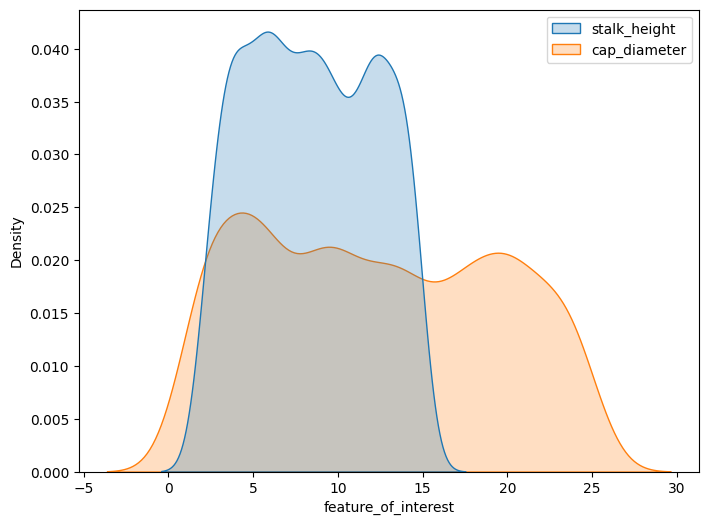

In [ ]:
plt.figure(figsize=(8, 6))
sns.kdeplot(mr[['stalk_height','cap_diameter']], fill=True, color='skyblue')
plt.xlabel('feature_of_interest')
plt.ylabel('Density')

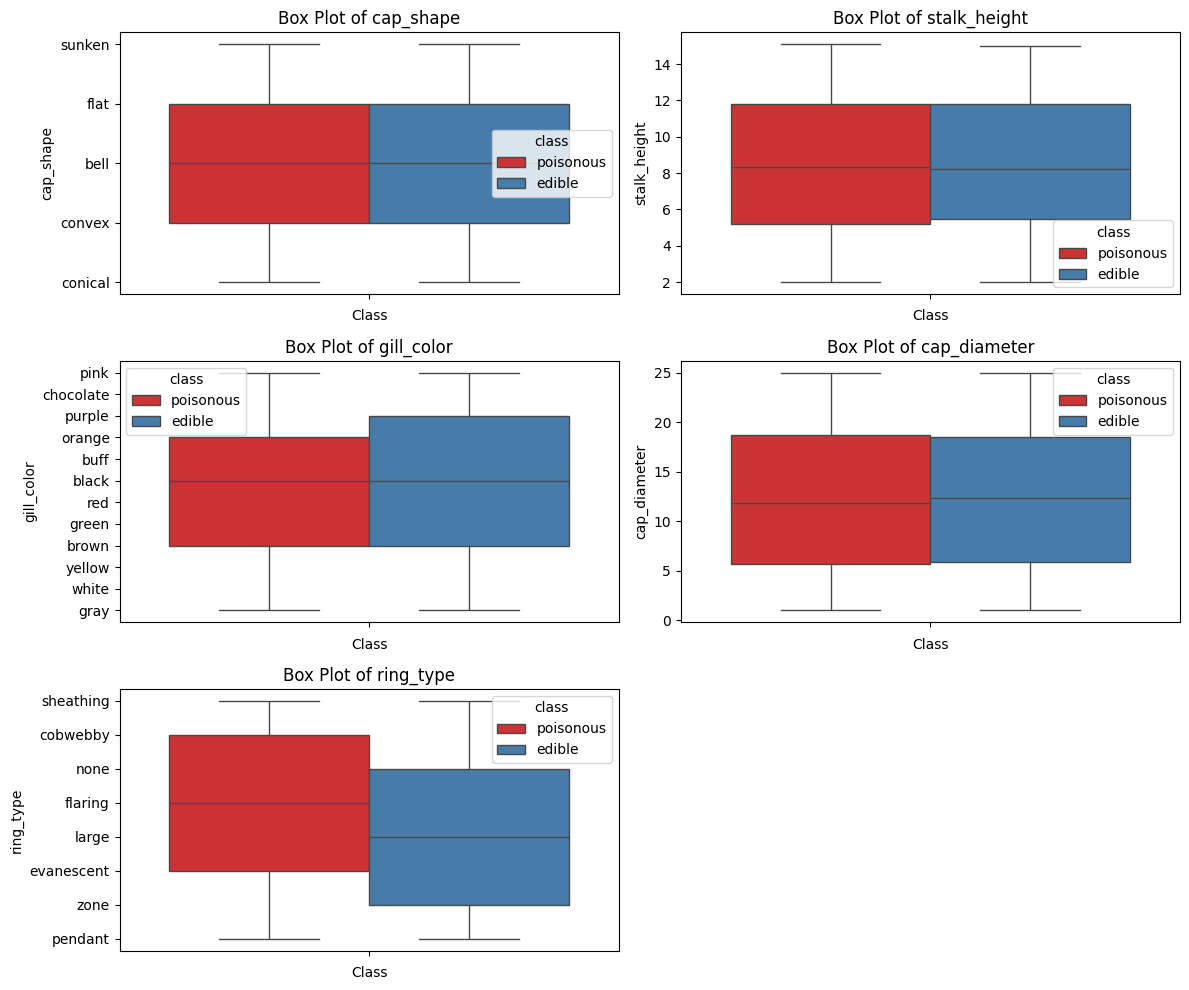

In [ ]:
columns_for_boxplot = ['cap_shape', 'stalk_height', 'gill_color', 'cap_diameter', 'ring_type']

# Create box plots for each selected column
plt.figure(figsize=(12, 10))
for i, column in enumerate(columns_for_boxplot):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data=mr, hue='class', y=column, palette='Set1')
    plt.title('Box Plot of {}'.format(column))
    plt.xlabel('Class')
    plt.ylabel(column)
plt.tight_layout()

## Data Preprocessing

In [ ]:
X = mr.drop('class', axis=1)
y = mr['class']

In [ ]:
label_encoders = {}
for column in X.select_dtypes(include=['object']):
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])
X

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,stalk_height,cap_diameter
0,4,2,7,0,1,1,2,0,7,1,...,8,0,0,2,6,3,1,5,14.276173,5.054983
1,4,0,6,0,1,3,1,1,3,0,...,0,1,0,2,6,1,2,5,3.952715,19.068319
2,3,1,5,1,4,1,1,0,8,1,...,3,1,3,2,6,6,0,5,9.054265,7.205884
3,0,2,4,1,3,3,0,0,6,0,...,5,0,3,2,0,4,1,0,5.226499,20.932692
4,3,3,8,1,5,2,1,1,6,0,...,7,1,2,0,4,8,1,4,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4,2,0,1,4,0,1,1,3,1,...,4,0,1,1,2,6,0,1,5.877891,17.464145
1996,4,2,5,1,5,0,2,1,9,1,...,4,0,2,1,7,8,2,5,6.500840,13.501957
1997,2,1,3,1,3,3,0,1,7,1,...,6,0,0,2,1,8,0,6,13.558064,11.270020
1998,0,3,7,0,7,2,0,1,6,0,...,5,1,3,1,0,1,5,6,11.092703,8.423199


In [ ]:
y

0       poisonous
1          edible
2       poisonous
3       poisonous
4       poisonous
          ...    
1995    poisonous
1996    poisonous
1997    poisonous
1998    poisonous
1999    poisonous
Name: class, Length: 2000, dtype: object

In [ ]:
X.describe()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,2.052500,1.556000,3.862000,0.511500,3.988500,1.561500,1.00650,0.503500,5.348000,0.480000,...,4.090000,0.5050,1.455500,0.990500,3.562000,3.905500,2.458000,3.070000,8.449118,12.314345
std,1.435888,1.114668,2.626672,0.499993,2.542361,1.126433,0.81902,0.500113,3.388752,0.499725,...,2.601977,0.5001,1.117875,0.809776,2.294295,2.619351,1.732263,1.971559,3.697217,7.048845
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
25%,1.000000,1.000000,2.000000,0.000000,2.000000,1.000000,0.00000,0.000000,2.000000,0.000000,...,2.000000,0.0000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,5.291009,5.723521
50%,2.000000,2.000000,4.000000,1.000000,4.000000,2.000000,1.00000,1.000000,5.000000,0.000000,...,4.000000,1.0000,2.000000,1.000000,4.000000,4.000000,2.000000,3.000000,8.318596,12.124902
75%,3.000000,3.000000,6.000000,1.000000,6.000000,3.000000,2.00000,1.000000,8.000000,1.000000,...,6.000000,1.0000,2.000000,2.000000,6.000000,6.000000,4.000000,5.000000,11.781272,18.698605
max,4.000000,3.000000,8.000000,1.000000,8.000000,3.000000,2.00000,1.000000,11.000000,1.000000,...,8.000000,1.0000,3.000000,2.000000,7.000000,8.000000,5.000000,6.000000,15.095066,25.000054


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,stalk_height,cap_diameter
968,4,0,4,0,7,2,2,1,6,0,...,8,0,1,1,3,4,3,2,10.471065,16.238880
240,3,0,6,1,6,2,0,1,10,0,...,4,0,1,1,1,1,2,6,6.100838,15.120614
819,1,1,0,0,3,1,2,0,11,1,...,8,0,0,1,2,4,0,5,6.702634,4.882309
692,4,2,2,1,4,2,2,1,2,1,...,5,0,2,1,2,7,0,2,8.248369,17.363862
420,4,3,7,1,5,0,1,1,7,0,...,2,1,1,0,0,2,1,0,14.514271,9.284473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,4,2,8,0,1,3,0,0,8,1,...,4,0,0,0,6,2,3,6,10.973666,13.435538
1294,1,1,6,1,4,3,2,1,8,0,...,8,0,0,0,5,2,3,0,2.570015,8.892683
860,3,3,0,0,4,0,2,0,6,0,...,4,0,3,2,0,3,4,5,3.628180,9.636546
1459,4,1,8,0,1,1,1,0,4,0,...,7,0,2,0,5,6,4,5,6.156392,22.060143


## Data Visualization

In [ ]:
data = pd.concat([X, y], axis=1)
data.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,stalk_height,cap_diameter,class
0,4,2,7,0,1,1,2,0,7,1,...,0,0,2,6,3,1,5,14.276173,5.054983,poisonous
1,4,0,6,0,1,3,1,1,3,0,...,1,0,2,6,1,2,5,3.952715,19.068319,edible
2,3,1,5,1,4,1,1,0,8,1,...,1,3,2,6,6,0,5,9.054265,7.205884,poisonous
3,0,2,4,1,3,3,0,0,6,0,...,0,3,2,0,4,1,0,5.226499,20.932692,poisonous
4,3,3,8,1,5,2,1,1,6,0,...,1,2,0,4,8,1,4,14.037532,12.545245,poisonous


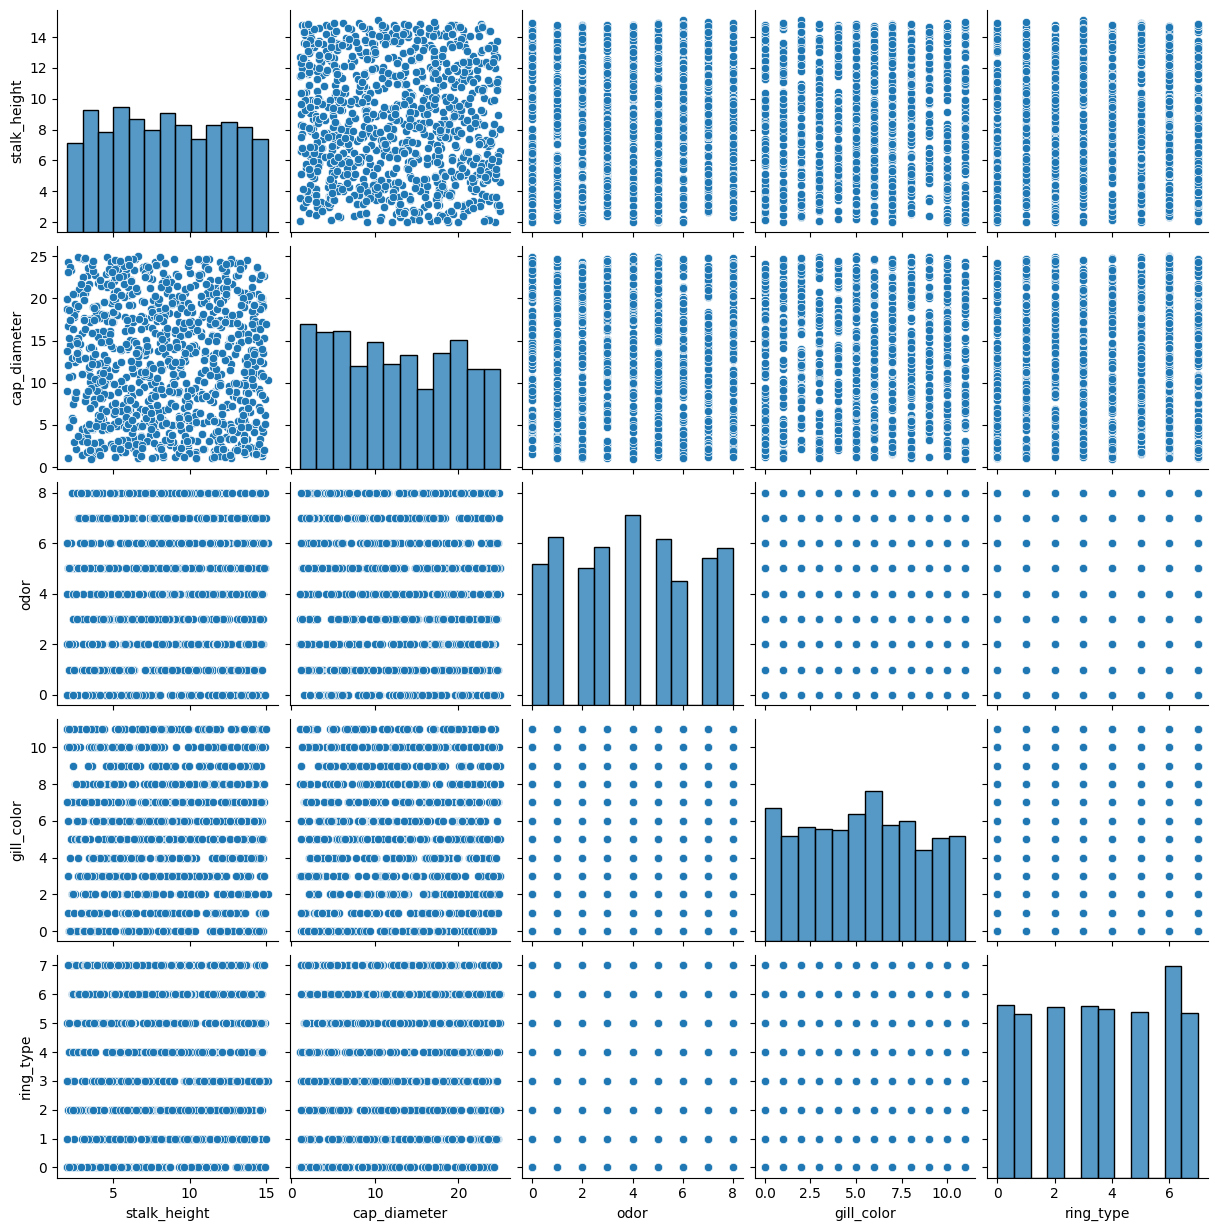

In [ ]:
sns.pairplot(data[['stalk_height', 'cap_diameter', 'odor', 'gill_color', 'ring_type']])

<Axes: xlabel='cap_shape', ylabel='count'>

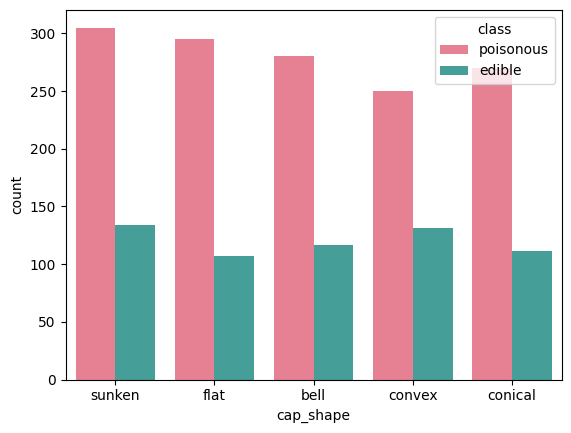

In [ ]:
sns.countplot(data=mr, x='cap_shape', hue='class', palette='husl')

Text(0, 0.5, 'Count')

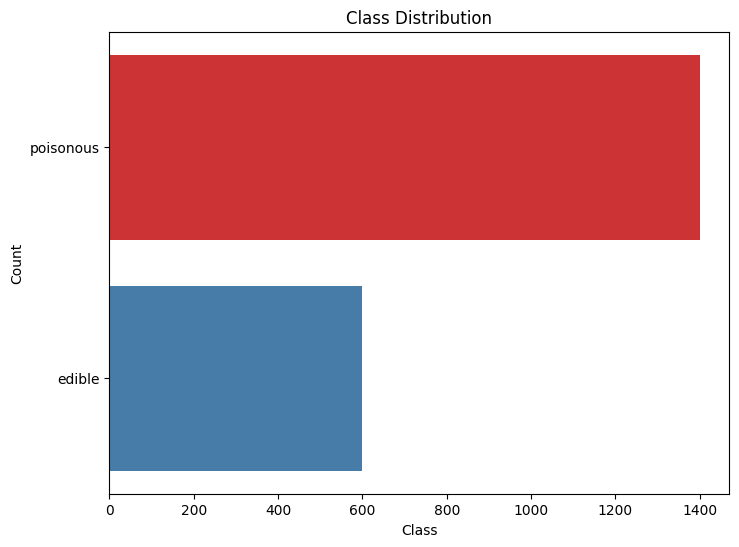

In [97]:
plt.figure(figsize=(8, 6))
sns.countplot(mr['class'], palette='Set1')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

## SVM Implementation

In [ ]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
clf = SVC(C= 15, gamma = 50)
clf.fit(X_train , y_train)
y_predict = clf.predict(X_test)
y_predict[:5]

array(['poisonous', 'poisonous', 'edible', 'poisonous', 'edible'],
      dtype=object)

In [ ]:
acc = accuracy_score(y_test, y_predict) * 100
print("Accuracy =", acc)

Accuracy = 88.5


In [ ]:
cm=confusion_matrix(y_test, y_predict)
cm

array([[ 87,  46],
       [  0, 267]])

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

      edible       1.00      0.65      0.79       133
   poisonous       0.85      1.00      0.92       267

    accuracy                           0.89       400
   macro avg       0.93      0.83      0.86       400
weighted avg       0.90      0.89      0.88       400



## Visualization of SVM Results

Text(70.72222222222221, 0.5, 'True Labels')

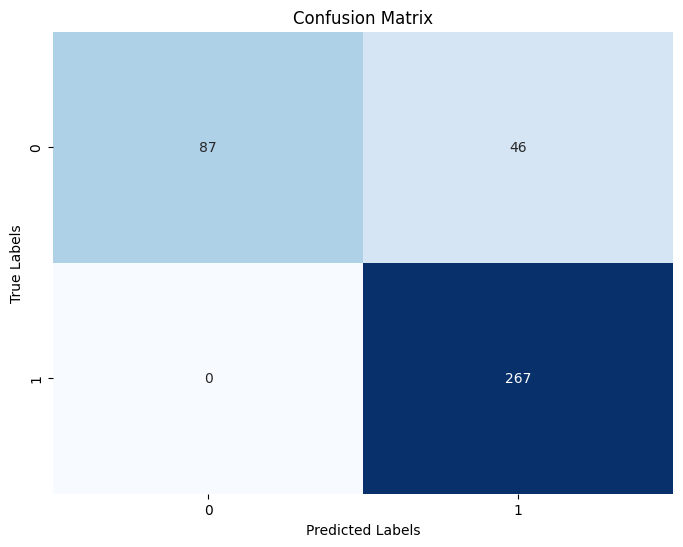

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

In [ ]:
y_np=y_train.values

In [ ]:
l = LabelEncoder()
y_en = l.fit_transform(y_train)
y_en

array([0, 1, 1, ..., 1, 1, 0])

array([[ 3.93307975, -2.12999356],
       [ 2.87071839,  1.74920621],
       [-7.18798004,  1.38687062],
       ...,
       [-2.64274918,  4.94466589],
       [ 9.9291366 ,  1.86621342],
       [11.27615795,  1.76718015]])

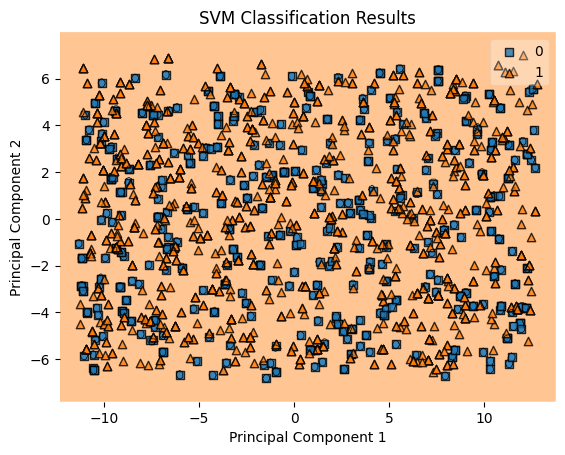

In [ ]:
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
clf.fit(X_train_pca , y_en)
plot_decision_regions(X_train_pca, y_en, clf=clf)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Classification Results')
X_train_pca

Text(0.5, 1.0, 'SVM Classification Results (PCA)')

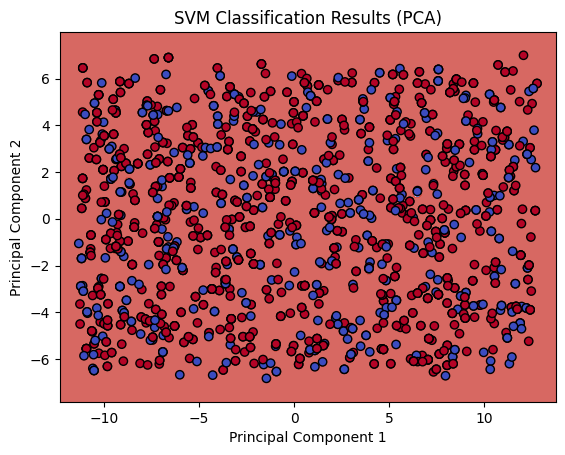

In [ ]:
import numpy as np
h = .02
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_en, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Classification Results')

## Parameter Tuning and Optimization

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    'C': [ 10,100,200],  # Regularization parameter
    'kernel': [ 'poly', 'rbf','sigmoid']  # Kernel type
}

svm = SVC()

grid_search = GridSearchCV(svm, param_grid, scoring='accuracy', cv=5, n_jobs=8)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=8,
             param_grid={'C': [10, 100, 200],
                         'kernel': ['poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [ ]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test)

accuracy = best_svm.score(X_test, y_test)
print("Accuracy:", accuracy)


Best Hyperparameters: {'C': 200, 'kernel': 'rbf'}
Accuracy: 0.8825


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      edible       0.83      0.81      0.82       133
   poisonous       0.91      0.92      0.91       267

    accuracy                           0.88       400
   macro avg       0.87      0.86      0.87       400
weighted avg       0.88      0.88      0.88       400



## Comparison and Analysis

In [ ]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(X, y)

SVC(kernel='linear')

The linear kernel in SVM may require more time for computation as it aims to find an optimal hyperplane with maximum margin, a process that becomes increasingly intensive with larger datasets or when the data exhibits complex or non-linear relationships, potentially leading to longer execution times compared to other kernel types.

In [ ]:
linear_pred=svm_linear.predict(X_test)
linear_pred[:5]

array(['poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous'],
      dtype=object)

In [ ]:
print(classification_report(y_test, linear_pred,zero_division=1))  #Linear Kernel

              precision    recall  f1-score   support

      edible       1.00      0.00      0.00       133
   poisonous       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.83      0.50      0.40       400
weighted avg       0.78      0.67      0.53       400



In [ ]:
print(classification_report(y_test, y_pred))  #Best Hyperparameters {'C': 200, 'kernel': 'rbf'}

              precision    recall  f1-score   support

      edible       0.83      0.81      0.82       133
   poisonous       0.91      0.92      0.91       267

    accuracy                           0.88       400
   macro avg       0.87      0.86      0.87       400
weighted avg       0.88      0.88      0.88       400



In [ ]:
print(classification_report(y_test, y_predict))  #C= 15, gamma = 50

              precision    recall  f1-score   support

      edible       1.00      0.65      0.79       133
   poisonous       0.85      1.00      0.92       267

    accuracy                           0.89       400
   macro avg       0.93      0.83      0.86       400
weighted avg       0.90      0.89      0.88       400



**Analyzing SVM Strengths and Weaknesses for the Mushroom Dataset:**

---




**Strengths:**
* SVMs perform well in high-dimensional spaces, making them
suitable for datasets with many features. In the Mushroom dataset, which likely has numerous features describing different characteristics of mushrooms, SVMs can effectively learn complex decision boundaries.  
*SVMs offer flexibility in kernel selection, allowing you to choose linear, polynomial, or radial basis function (RBF) kernels based on the dataset's characteristics. This flexibility enables SVMs to capture nonlinear relationships in the data.  
*SVMs have regularization parameters like
C that help prevent overfitting by controlling the trade-off between maximizing the margin and minimizing the classification error. This regularization contributes to the model's generalization performance.
* The radial basis function (rbf) kernel is particularly effective for modeling the complex relationships within the Mushroom dataset, making it the optimal choice among kernel functions.

\
**Weaknesses:**

* SVMs are sensitive to the choice of hyperparameters, such as the regularization parameter
C and the kernel parameters. Finding the optimal hyperparameters through grid search or cross-validation can be computationally expensive and may require significant tuning effort.  
* SVMs can be computationally intensive, especially for large datasets, as they involve solving a quadratic optimization problem. Training SVMs on large datasets may require substantial memory and computational resources.
* Using the linear method in SVM might take longer to calculate for the Mushroom dataset because of its specific features.

**Practical Implications of SVM in Real-world Classification Tasks:**

\
1. **Biomedical Applications**: SVM has been widely used in biomedical applications for tasks such as disease diagnosis and drug discovery. In the case of the Mushroom dataset, SVM could be employed for identifying poisonous mushrooms in healthcare applications to prevent accidental poisonings.

2. **Text and Image Classification:** SVM has shown promising results in text categorization and image classification tasks. For example, in text classification, SVM could be used for sentiment analysis or spam detection. In image classification, it could classify images based on their content or detect objects within images.

3. **Financial Fraud Detection:** SVM can be utilized for detecting fraudulent activities in financial transactions. By training on historical data, SVM can learn patterns indicative of fraudulent behavior and flag suspicious transactions in real-time.

4. **Anomaly Detection:** SVM can be used for anomaly detection in various domains, such as cybersecurity and manufacturing. By identifying deviations from normal behavior, SVM can help detect anomalies that might indicate security breaches or equipment malfunctions.